### Load Dataset

In [ ]:
# Load Irony detection Dataset
import pandas as pd

# Train data
train_df = pd.read_csv('train.csv')
print(train_df.head())

# Test data
test_df = pd.read_csv('test.csv')
print(test_df.head())

   Unnamed: 0                                              tweet  label
0           0  تو این اوضاع احوال سخت و میزان مشکلات، اگه کسی...      0
1           1  انتظار بروز موج هفتم کرونا در اردیبهشت را ندار...      0
2           2  ‏هوا انقدر گرمه که جامد میری بیرون مایع برمیگر...      1
3           3  🔺تقاضا «آلن دلون» برای مرگ خودخواسته تکذیب شد ...      0
4           4  چه داستانیه وقتی کاپشنتو میندازی رو شونه یکی د...      0
   Unnamed: 0                                              tweet  label
0           0  ‏ریمیکسا واقعا داره به سمت عجیبی میره. امروز ی...      1
1           1  بازگشت کی‌روش به ایران تکذیب شد «محمد جماعت» م...      0
2           2  ‏ببینید دوستان اینایی که تو اینستا رضایت مشتری...      0
3           3  ‏هروقت یه مسیر اشتباهی رو رفتی و به موفقیت رسی...      0
4           4  ‏من هر کدوم از رفیقام رو میبینم که امسال دستاو...      1


In [ ]:
# The shape of train tweet data set
print(train_df.shape)

# The shape of test tweet data set
print(test_df.shape)

(11956, 3)
(2990, 3)


In [ ]:
# The list of all tweet sentences
# Train
X_train = list(train_df['tweet'])

#Test
X_test = list(test_df['tweet'])

In [ ]:
# The list of all labels
#Train
y_train = list(train_df['label'])

# Test
y_test = list(test_df['label'])

### Build the model

In [ ]:
# Install the 'transformes' library
!pip install transformers

**First step: Call the ParsBert Pretrained Model and Tokenizer**

In [ ]:
# Call the ParsBert Pre-trained Model and Tokenizer from HuggingFace
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification

ParsBert_model_name_and_path = "HooshvareLab/bert-fa-zwnj-base"    # This is the path of ParsBert Version 3
config = AutoConfig.from_pretrained(ParsBert_model_name_and_path)
tokenizer = AutoTokenizer.from_pretrained(ParsBert_model_name_and_path)
model = AutoModelForSequenceClassification.from_pretrained(ParsBert_model_name_and_path, num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/426k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/473M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Test the Tokenizer**

In [ ]:
# An Example of Tokenizer
text = X_train[1]
print(text)
tokenizer.tokenize(text)

انتظار بروز موج هفتم کرونا در اردیبهشت را نداریم دبیر کمیته اپیدمیولوژی کمیته علمی کرونا: 🔹با توجه به بازگشایی مدارس، تنها ممکن است افزایش نسبی و مختصری داشته باشیم. برای مشاهده اثر بازگشایی مدارس و دانشگاه ها باید ۲ هفته صبر کنیم. 🔹 شاهد نوساناتی در افزایش موارد بستری هستیم و موارد سرپایی کرونا افزایش داشته اند؛ اما بعید است که موج هفتم در اردیبهشت اتفاق بیفتد.


['انتظار',
 'بروز',
 'موج',
 'هفتم',
 'کرونا',
 'در',
 'اردیبهشت',
 'را',
 'نداریم',
 'دبیر',
 'کمیته',
 'اپیدمی',
 '##ولوژی',
 'کمیته',
 'علمی',
 'کرونا',
 ':',
 '[UNK]',
 'توجه',
 'به',
 'بازگشایی',
 'مدارس',
 '،',
 'تنها',
 'ممکن',
 'است',
 'افزایش',
 'نسبی',
 'و',
 'مختصری',
 'داشته',
 'باشیم',
 '.',
 'برای',
 'مشاهده',
 'اثر',
 'بازگشایی',
 'مدارس',
 'و',
 'دانشگاه',
 'ها',
 'باید',
 '۲',
 'هفته',
 'صبر',
 'کنیم',
 '.',
 '[UNK]',
 'شاهد',
 'نوسانات',
 '##ی',
 'در',
 'افزایش',
 'موارد',
 'بستری',
 'هستیم',
 'و',
 'موارد',
 'سرپایی',
 'کرونا',
 'افزایش',
 'داشته',
 'اند',
 '؛',
 'اما',
 'بعید',
 'است',
 'که',
 'موج',
 'هفتم',
 'در',
 'اردیبهشت',
 'اتفاق',
 'بیفتد',
 '.']

**Second step: Tokenize each sentences with ParsBert Tokenizer**

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Train Encoding each token to its id for train data set
tokenized_train = tokenizer(X_train, truncation=True, padding='max_length', return_tensors='pt')
train_labels = torch.tensor(y_train)

# Test Encodings for each token to its id for test data set
tokenized_test = tokenizer(X_test, truncation=True, padding='max_length', return_tensors='pt')
test_labels = torch.tensor(y_test)

In [ ]:
# Create PyTorch datasets
train_dataset = TensorDataset(tokenized_train.input_ids, tokenized_train.attention_mask, train_labels)
test_dataset = TensorDataset(tokenized_test.input_ids, tokenized_test.attention_mask, test_labels)

In [ ]:
# Create PyTorch data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(42000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW


# Set up optimizer and loss function
optimizer = AdamW(model.parameters(), lr=3e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            _, predicted = torch.max(outputs.logits, 1)

            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        accuracy = total_correct / total_samples
        print(f"Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/2, Test Accuracy: 0.8003344481605351
Epoch 2/2, Test Accuracy: 0.797324414715719


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


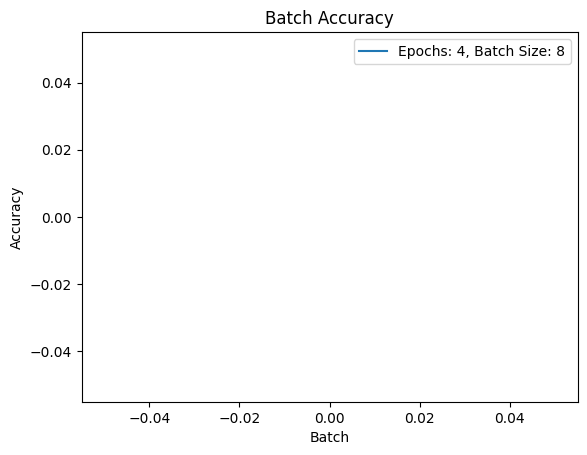

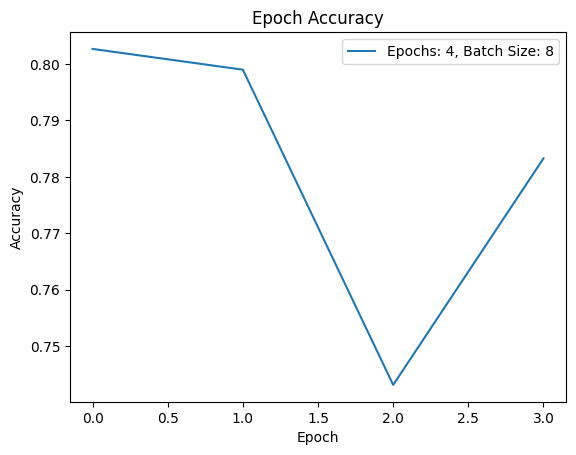

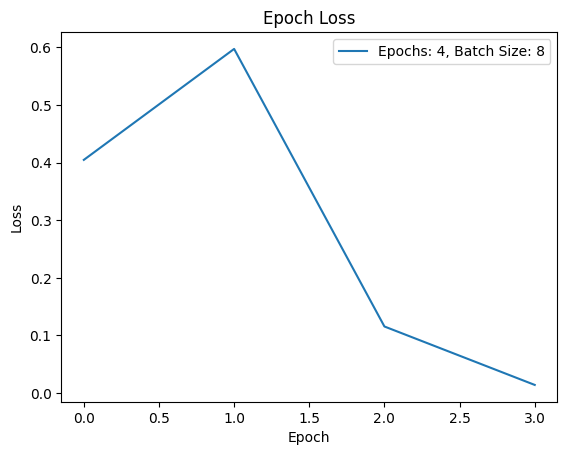

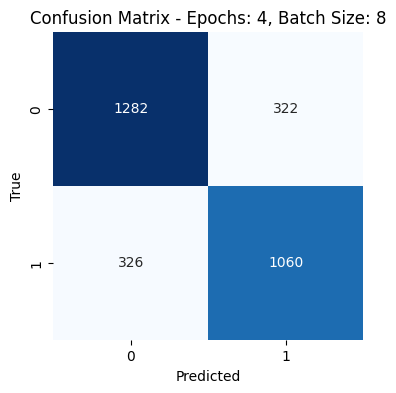

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


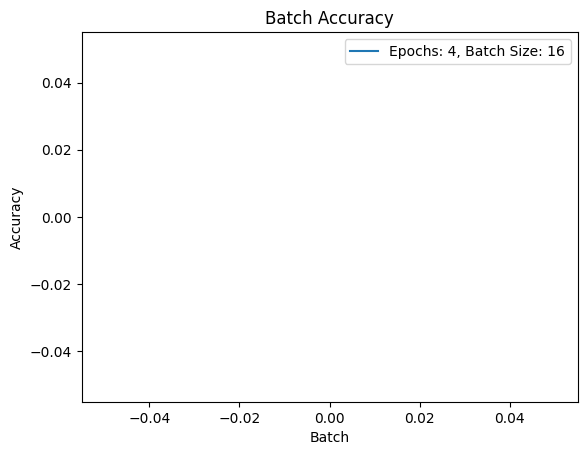

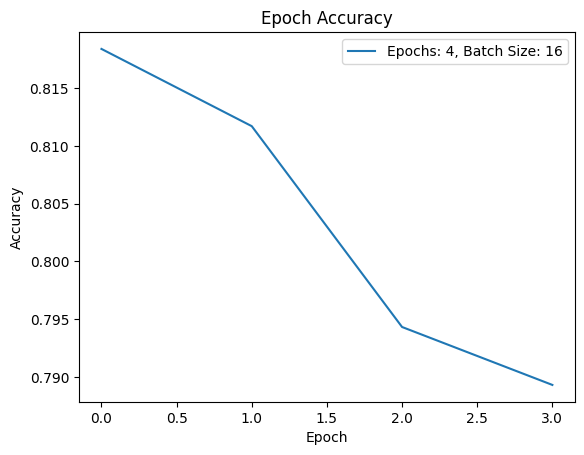

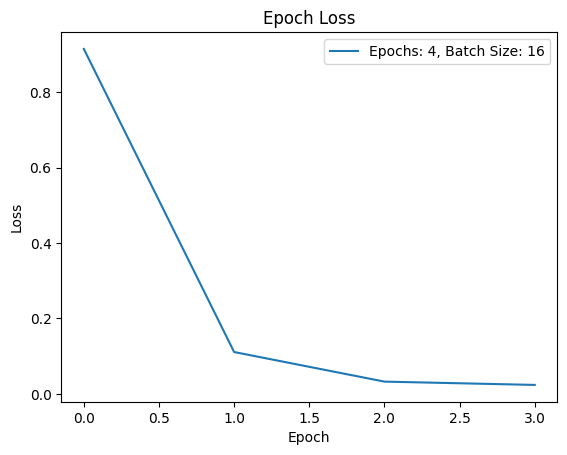

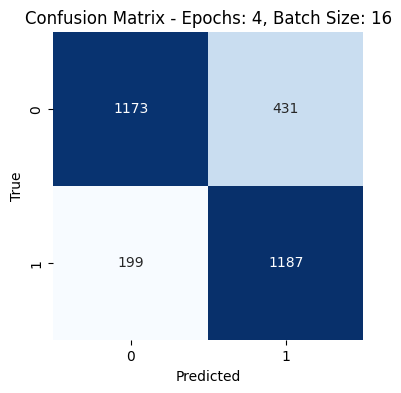

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 96.00 MiB. GPU 0 has a total capacty of 14.75 GiB of which 95.06 MiB is free. Process 1998 has 14.65 GiB memory in use. Of the allocated memory 14.24 GiB is allocated by PyTorch, and 287.73 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up optimizer and loss function
optimizer = AdamW(model.parameters(), lr=3e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop with different epochs and batch sizes
epochs_list = [4, 7, 10]
batch_sizes_list = [8, 16, 32]

for epochs in epochs_list:
    for batch_size in batch_sizes_list:
        # Create PyTorch data loaders with the current batch size
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size)

        # Reset the model
        model = AutoModelForSequenceClassification.from_pretrained(ParsBert_model_name_and_path, num_labels=2)
        model.to(device)

        # Set up optimizer and loss function for each run
        optimizer = AdamW(model.parameters(), lr=3e-5)
        criterion = torch.nn.CrossEntropyLoss()

        # Lists to store training information for plotting
        batch_accuracies = []
        epoch_accuracies = []
        epoch_losses = []

        # Training loop
        for epoch in range(epochs):
            model.train()
            for batch in train_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()

            # Evaluation
            model.eval()
            with torch.no_grad():
                total_correct = 0
                total_samples = 0
                total_loss = 0

                for batch in test_loader:
                    input_ids, attention_mask, labels = batch
                    input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

                    outputs = model(input_ids, attention_mask=attention_mask)
                    _, predicted = torch.max(outputs.logits, 1)

                    total_correct += (predicted == labels).sum().item()
                    total_samples += labels.size(0)
                    total_loss += loss.item()

                accuracy = total_correct / total_samples
                epoch_accuracies.append(accuracy)
                epoch_losses.append(total_loss / len(test_loader))

        # Plot Batch Accuracy
        plt.plot(batch_accuracies, label=f'Epochs: {epochs}, Batch Size: {batch_size}')
        plt.xlabel('Batch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Batch Accuracy')
        plt.show()

        # Plot Epoch Accuracy
        plt.plot(epoch_accuracies, label=f'Epochs: {epochs}, Batch Size: {batch_size}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Epoch Accuracy')
        plt.show()

        # Plot Epoch Loss
        plt.plot(epoch_losses, label=f'Epochs: {epochs}, Batch Size: {batch_size}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Epoch Loss')
        plt.show()

        # Confusion Matrix
        model.eval()
        all_labels = []
        all_predictions = []

        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                _, predicted = torch.max(outputs.logits, 1)

                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

        # Create confusion matrix
        cm = confusion_matrix(all_labels, all_predictions)

        # Plot confusion matrix
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - Epochs: {epochs}, Batch Size: {batch_size}')
        plt.show()
